---

# Final Team Project: Machine Learning IoT Application Design and Implementation
## Team 1 - Jason Raimondi, Sundar Sundaresan, and Viktor Veselov
## University of San Diego
## AAI-530: Data Analytics and IoT
## Professor An Tran
## 2023-02-27

---

### GitHub Repository:
### https://github.com/SweatyCrayfish/Room-Ocupancy-Application
### Final Project - ML IoT Application.ipynb

---

### Tableau Public Dashboard:
### https://public.tableau.com/???

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from scipy.stats import skew

## Exploratory Data Analysis

### Load and clean data

The Room Occupancy Estimation dataset can be located in the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation

First, we will read the dataset from a CSV file and assign to a Pandas dataframe.  Then, we will perform some initial discovery to start exploring and learning the dataset.

In [66]:
# create new dataframe with raw data
df_raw = pd.read_csv('Occupancy_Estimation.csv')

In [67]:
# view shape of dataframe
print ('Total rows in df_raw =', df_raw.shape[0])
print ('Total columns in df_raw =', df_raw.shape[1])

Total rows in df_raw = 10129
Total columns in df_raw = 19


In [68]:
# view dataframe head
df_raw.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


We can see that we have separate columns for Date and Time.  To support our later time-series machine learning prediction, we will plan to combine into a single Datetime column.

In [69]:
# print data types and describe data
print (df_raw.dtypes)
df_raw.describe()

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


We can see that we currently have 17 total numeric features (excluding Date and Time).  For our project, we will be predicting a different feature for each machine learning model developed.  To reduce complexity of our IoT system design, we will be using average values for Temperature, Light, and Sound, which will reduce the number of columns for each of these features from 4 to 1, or from 12 to 3 when considering them all.  We will create copy of the raw data and make these changes now.

In [70]:
# create new dataframe for modifications
df = df_raw.copy()

In [71]:
# create Datetime column

# combine into a single column
df['Datetime'] = df['Date'] + ' ' + df['Time']

# convert to datetime, specify that year comes first in the format
df['Datetime'] = pd.to_datetime(df['Datetime'], yearfirst=True)

In [72]:
# print data types and describe data
print (df.dtypes)
df.head()

Date                            object
Time                            object
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
Datetime                datetime64[ns]
dtype: object


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44


We can see that our Datetime column is now a datetime data type.  Let's check to see if the Date and Time columns are date and time data types.

In [73]:
df['Date'][0]

'2017/12/22'

The Date column does not appear to be a date data type.  Let's also check the Time column.

In [74]:
df['Time'][0]

'10:49:41'

The Time column does not appear to be a time data type.  Let's use our Datetime column to turn the Date and Time columns into date and time data types.

In [75]:
# convert to date and time data types
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

Let's now recheck our Date and Time columns to verify the data types are correct.

In [76]:
df['Date'][0]

datetime.date(2017, 12, 22)

The Date column is now a date data type.

In [77]:
df['Time'][0]

datetime.time(10, 49, 41)

The Time column is now a time data type.

Let's review the describe() results again now that we have a numeric Datetime column that can be included in the results.

In [78]:
# describe, including statistics on Datetime column
df.describe(datetime_is_numeric = True)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559,2017-12-27 20:27:23.034554112
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,2017-12-22 10:49:41
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,2017-12-23 09:14:33
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,2017-12-24 07:06:45
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000,2017-12-26 04:58:18
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000,2018-01-11 09:00:09
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633,NaN


We can see that our IoT sensor readings start on 12/22/2017 and end on 1/11/2018.  We can also see the Room Occupany Count ranging from 0 to 3 persons.  Let's check the unique values of Date and Room Occupancy Count.

In [79]:
# print unique Dates
print ('Unique Dates: \n', df['Date'].unique(), '\n')

# print unique Room Occupancy Count
print ('Unique Room Occupancy Count: \n', df['Room_Occupancy_Count'].unique())

Unique Dates: 
 [datetime.date(2017, 12, 22) datetime.date(2017, 12, 23)
 datetime.date(2017, 12, 24) datetime.date(2017, 12, 25)
 datetime.date(2017, 12, 26) datetime.date(2018, 1, 10)
 datetime.date(2018, 1, 11)] 

Unique Room Occupancy Count: 
 [1 2 3 0]


We can see that data was not collected for every day in the entire range of dates, as there is a gap between 12/26/2017 and 1/10/2018.  We can also see that Christmas Day and days surrounding the Holiday are included, so it's possible that these were days when there was no room occupancy.  We can also see that the Room Occupancy does range from 0 to 3 occupants, as was described in the dataset source information.  Our row counts are all equal, so there does not appear to be any missing data.  We will check to be sure.

<Axes: >

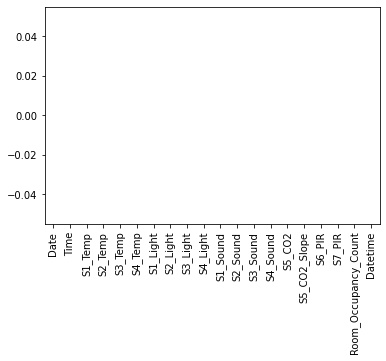

In [80]:
# Visualize any missing data
df.isna().sum().plot.bar()

The bar graph confirms that we are not missing any data.  Our IoT system is based on a single IoT device in a room, versus multiple devices that were used to generate the original dataset.  To adapt the dataset to our IoT system design, we will consolidate Temperature, Light, and Sound columns into corresponding average columns.  This will simulate these readings coming from single sensors, as in our IoT system design.  It will also reduce the complexity of the dataset.

In [81]:
# create new columns for combined (average) temperature, light, and sound
df['Temp'] = (df['S1_Temp'] + df['S2_Temp'] + df['S3_Temp'] + df['S4_Temp'] / 4)
df['Light'] = (df['S1_Light'] + df['S2_Light'] + df['S3_Light'] + df['S4_Light'] / 4)
df['Sound'] = (df['S1_Sound'] + df['S2_Sound'] + df['S3_Sound'] + df['S4_Sound'] / 4)

# view dataframe
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,Temp,Light,Sound
0,2017-12-22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41,80.595,218.0,0.3450
1,2017-12-22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12,80.610,217.0,1.0550
2,2017-12-22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42,80.610,218.0,0.6350
3,2017-12-22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13,80.670,218.0,0.6325
4,2017-12-22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44,80.670,219.0,0.3150


Let's now drop the separate reading colums for temperature, light, and sound then view our dataframe again.

In [82]:
# drop individual reading columns for temperature, light, and sound
df = df.drop(columns=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])
df = df.drop(columns=['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light'])
df = df.drop(columns=['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound'])

# view dataframe
df.head()

,Date,Time,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime,Temp,Light,Sound
0,2017-12-22,10:49:41,390,0.769231,0,0,1,2017-12-22 10:49:41,80.595,218.0,0.3450
1,2017-12-22,10:50:12,390,0.646154,0,0,1,2017-12-22 10:50:12,80.610,217.0,1.0550
2,2017-12-22,10:50:42,390,0.519231,0,0,1,2017-12-22 10:50:42,80.610,218.0,0.6350
3,2017-12-22,10:51:13,390,0.388462,0,0,1,2017-12-22 10:51:13,80.670,218.0,0.6325
4,2017-12-22,10:51:44,390,0.253846,0,0,1,2017-12-22 10:51:44,80.670,219.0,0.3150


Now, we will rename and reorder a few columns before moving forward.

In [83]:
# columns to rename
renaming = {'S5_CO2': 'CO2', 
            'S5_CO2_Slope': 'CO2_Slope', 
            'S6_PIR': 'PIR_S1', 
            'S7_PIR': 'PIR_S2',}

# rename columns in existing dataframe
df = df.rename(renaming, axis=1)

# reorder columns in existing dataframe
df = df[['Datetime', 'Date', 'Time', 'Temp', 'Light', 'Sound', 'CO2', 'CO2_Slope', 'PIR_S1', 'PIR_S2', 'Room_Occupancy_Count']]

# view dataframe
df.head()

,Datetime,Date,Time,Temp,Light,Sound,CO2,CO2_Slope,PIR_S1,PIR_S2,Room_Occupancy_Count
0,2017-12-22 10:49:41,2017-12-22,10:49:41,80.595,218.0,0.3450,390,0.769231,0,0,1
1,2017-12-22 10:50:12,2017-12-22,10:50:12,80.610,217.0,1.0550,390,0.646154,0,0,1
2,2017-12-22 10:50:42,2017-12-22,10:50:42,80.610,218.0,0.6350,390,0.519231,0,0,1
3,2017-12-22 10:51:13,2017-12-22,10:51:13,80.670,218.0,0.6325,390,0.388462,0,0,1
4,2017-12-22 10:51:44,2017-12-22,10:51:44,80.670,219.0,0.3150,390,0.253846,0,0,1


In [84]:
# describe dataframe
df.describe(datetime_is_numeric = True)

,Datetime,Temp,Light,Sound,CO2,CO2_Slope,PIR_S1,PIR_S2,Room_Occupancy_Count
count,10129,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,2017-12-27 20:27:23.034554112,82.495223,89.014908,0.472323,460.860401,-0.004830,0.090137,0.079574,0.398559
min,2017-12-22 10:49:41,80.595000,0.000000,0.165000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,2017-12-23 09:14:33,81.442500,0.000000,0.195000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,2017-12-24 07:06:45,82.152500,0.000000,0.205000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,2017-12-26 04:58:18,83.007500,92.000000,0.225000,465.000000,0.000000,0.000000,0.000000,0.000000
max,2018-01-11 09:00:09,87.370000,720.250000,11.380000,1270.000000,8.980769,1.000000,1.000000,3.000000
std,NaN,1.359938,166.377263,0.856572,199.964940,1.164990,0.286392,0.270645,0.893633


No further cleaning appears to be necessary for this dataset.

### Visualizing the data

Let's create some visualizations to get a better understanding of the dataset and distribution of data.  We will start with histograms and boxplots.

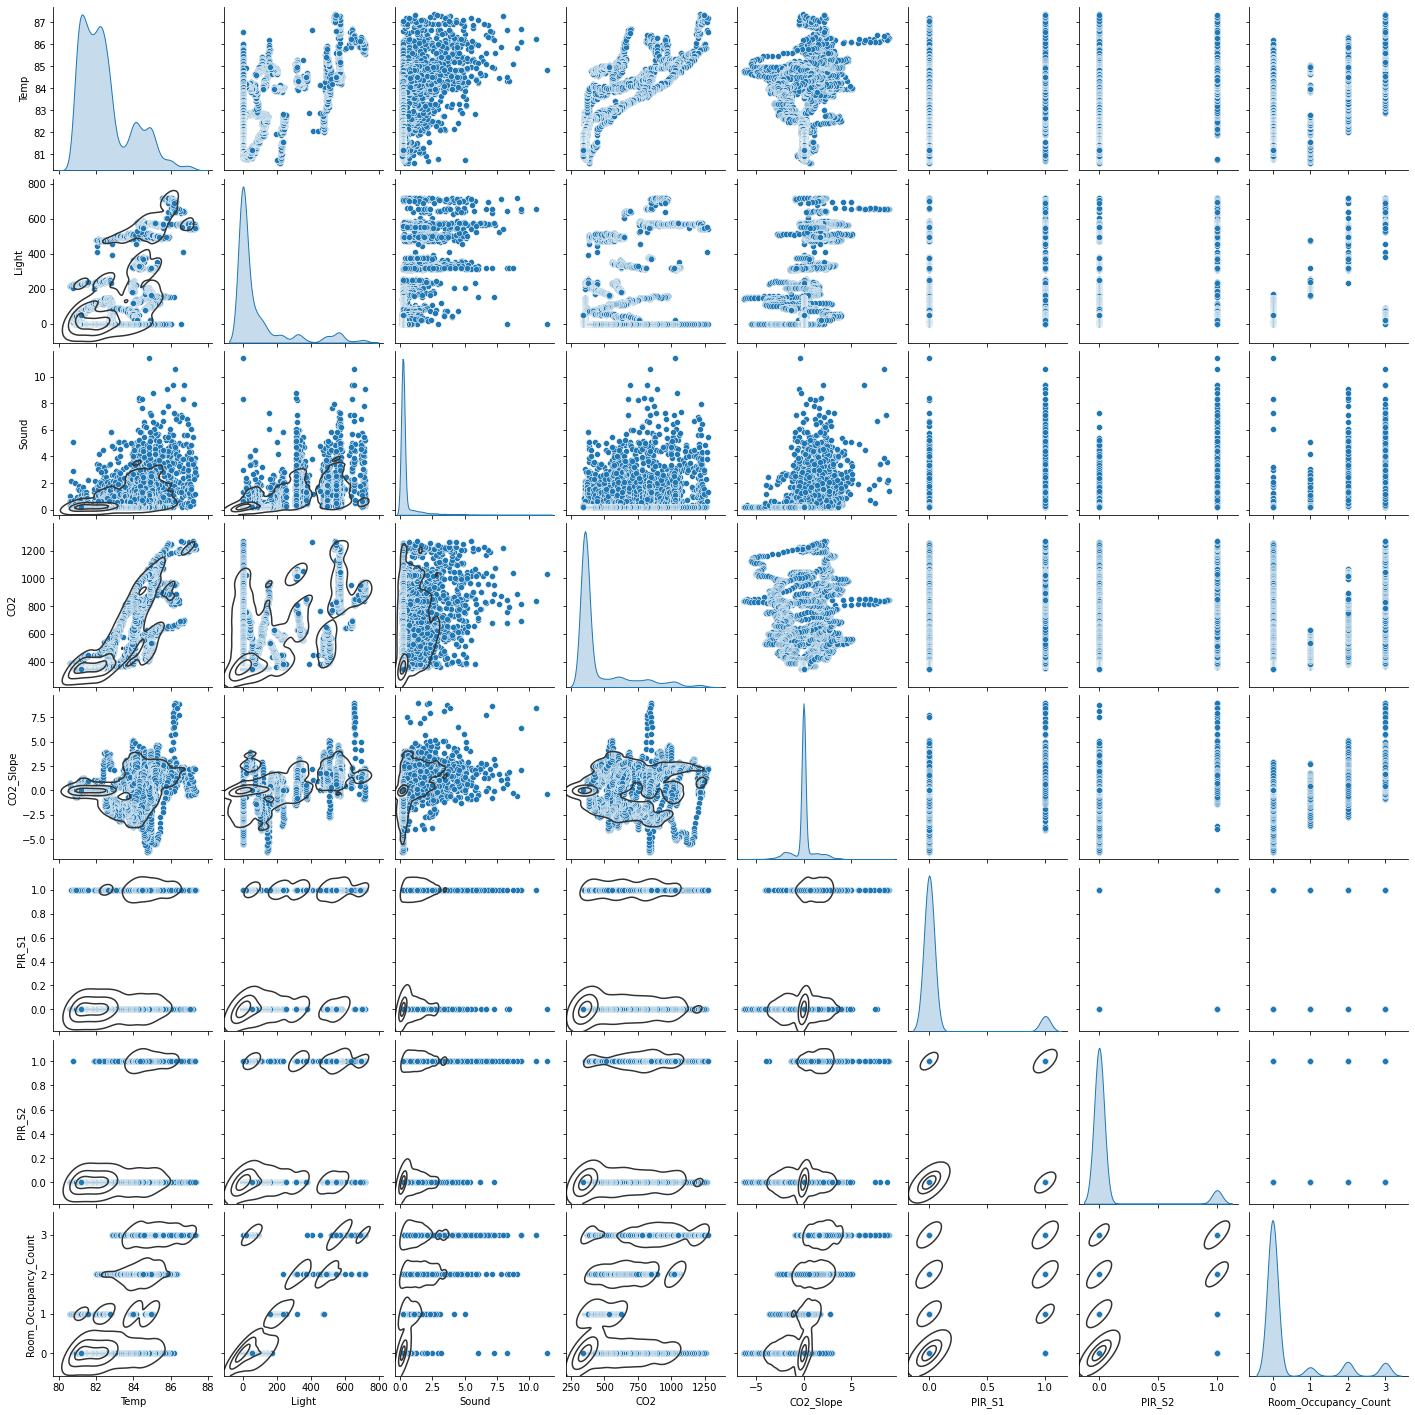

In [36]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

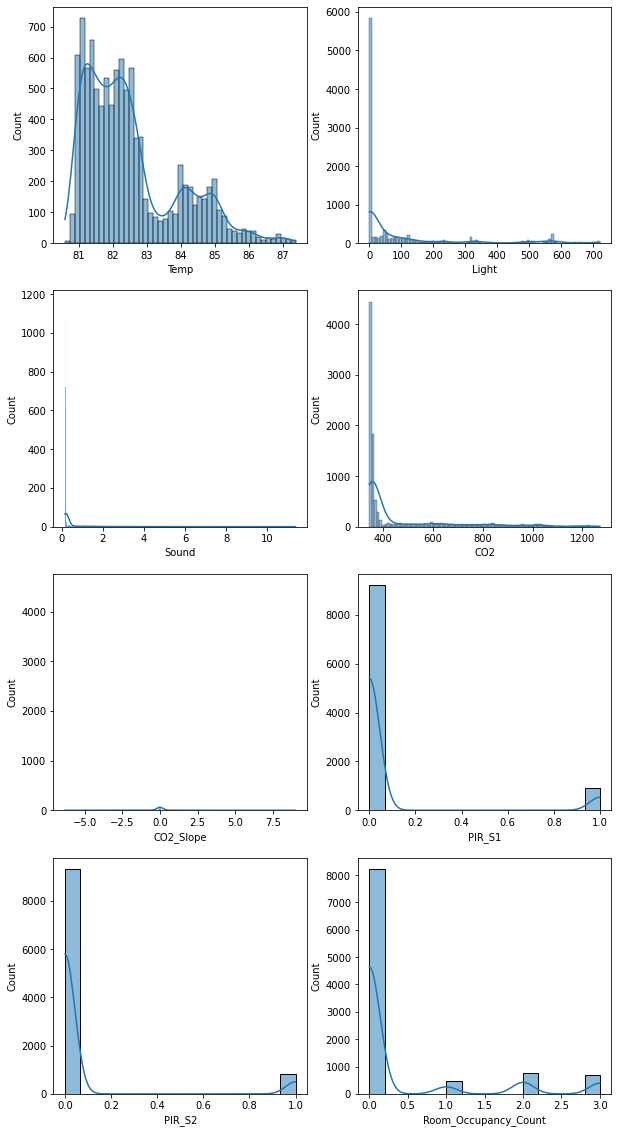

In [25]:
# create histograms for each feature
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

sns.histplot(data=df, x='Temp', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x='Light', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x='Sound', kde=True, ax=axs[1, 0])
sns.histplot(data=df, x='CO2', kde=True, ax=axs[1, 1])
sns.histplot(data=df, x='CO2_Slope', kde=True, ax=axs[2, 0])
sns.histplot(data=df, x='PIR_S1', kde=True, ax=axs[2, 1])
sns.histplot(data=df, x='PIR_S2', kde=True, ax=axs[3, 0])
sns.histplot(data=df, x='Room_Occupancy_Count', kde=True, ax=axs[3, 1])

plt.show()

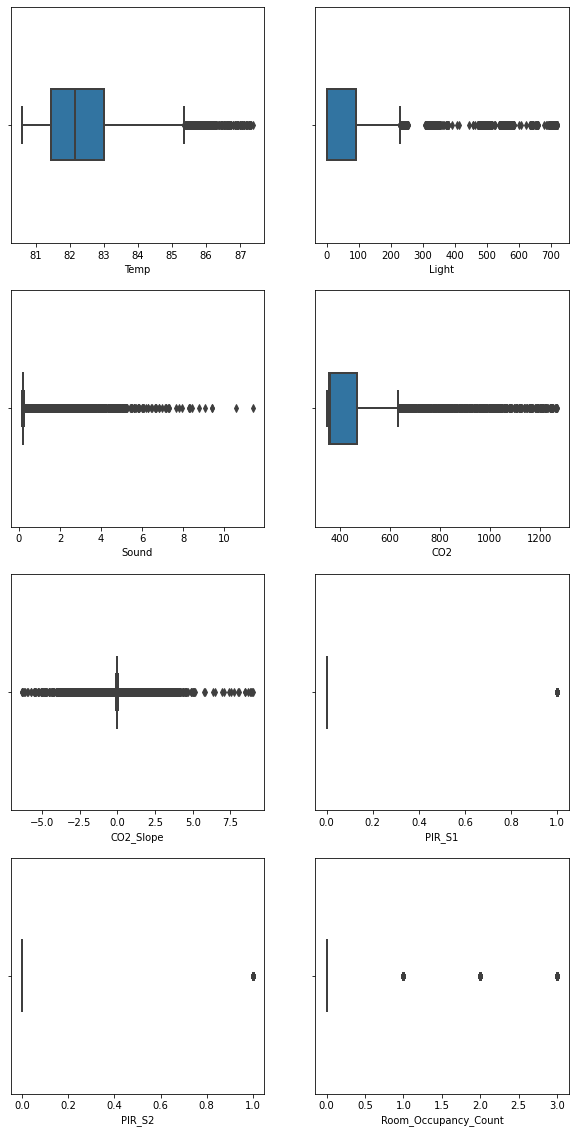

In [88]:

# create boxplots for each feature
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

sns.boxplot(data=df, x='Temp', width=.3, linewidth=2, fliersize=5, ax=axs[0, 0])
sns.boxplot(data=df, x='Light', width=.3, linewidth=2, fliersize=5, ax=axs[0, 1])
sns.boxplot(data=df, x='Sound', width=.3, linewidth=2, fliersize=5, ax=axs[1, 0])
sns.boxplot(data=df, x='CO2', width=.3, linewidth=2, fliersize=5, ax=axs[1, 1])
sns.boxplot(data=df, x='CO2_Slope', width=.3, linewidth=2, fliersize=5, ax=axs[2, 0])
sns.boxplot(data=df, x='PIR_S1', width=.3, linewidth=2, fliersize=5, ax=axs[2, 1])
sns.boxplot(data=df, x='PIR_S2', width=.3, linewidth=2, fliersize=5, ax=axs[3, 0])
sns.boxplot(data=df, x='Room_Occupancy_Count', width=.3, linewidth=2, fliersize=5, ax=axs[3, 1])

plt.show()

In [89]:
for x in ['Temp', 'Light', 'Sound', 'CO2', 'CO2_Slope', 'PIR_S1', 'PIR_S2', 'Room_Occupancy_Count']:
    # calculate the IQR
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1

    # calculate the mean and standard deviation
    mean = df[x].mean()
    std_dev = df[x].std()

    # calculate the median
    median = df[x].median()

    print(f"For {x}:")
    print(f"The first quartile is {q1:.2f}")
    print(f"The third quartile is {q3:.2f}")
    print(f"The IQR is {iqr:.2f}")
    print(f"The mean is {mean:.2f}")
    print(f"The standard deviation is {std_dev:.2f}")
    print(f"The median is {median:.2f}")
    print("\n")


For Temp:
The first quartile is 81.44
The third quartile is 83.01
The IQR is 1.56
The mean is 82.50
The standard deviation is 1.36
The median is 82.15


For Light:
The first quartile is 0.00
The third quartile is 92.00
The IQR is 92.00
The mean is 89.01
The standard deviation is 166.38
The median is 0.00


For Sound:
The first quartile is 0.20
The third quartile is 0.23
The IQR is 0.03
The mean is 0.47
The standard deviation is 0.86
The median is 0.21


For CO2:
The first quartile is 355.00
The third quartile is 465.00
The IQR is 110.00
The mean is 460.86
The standard deviation is 199.96
The median is 360.00


For CO2_Slope:
The first quartile is -0.05
The third quartile is 0.00
The IQR is 0.05
The mean is -0.00
The standard deviation is 1.16
The median is 0.00


For PIR_S1:
The first quartile is 0.00
The third quartile is 0.00
The IQR is 0.00
The mean is 0.09
The standard deviation is 0.29
The median is 0.00


For PIR_S2:
The first quartile is 0.00
The third quartile is 0.00
The IQR i

It shows all neccessary parameters for all box plots

(write analysises here)

#### Remove all outliers

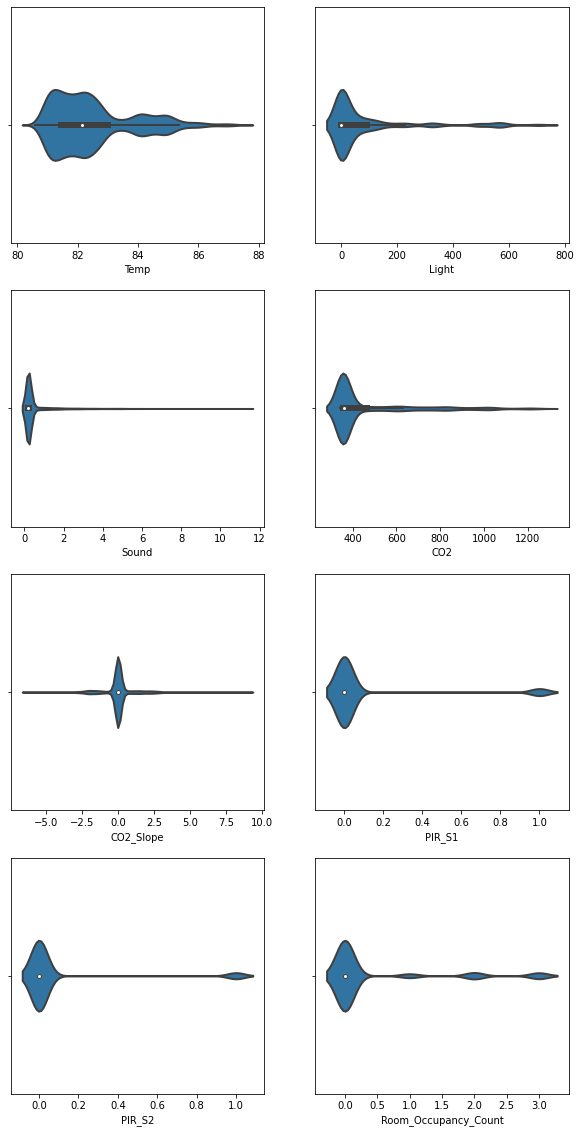

In [90]:
# create violinplot for each feature and remove all outliers
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

sns.violinplot(data=df, x='Temp', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[0, 0])
sns.violinplot(data=df, x='Light', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[0, 1])
sns.violinplot(data=df, x='Sound', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[1, 0])
sns.violinplot(data=df, x='CO2', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[1, 1])
sns.violinplot(data=df, x='CO2_Slope', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[2, 0])
sns.violinplot(data=df, x='PIR_S1', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[2, 1])
sns.violinplot(data=df, x='PIR_S2', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[3, 0])
sns.violinplot(data=df, x='Room_Occupancy_Count', width=.3, linewidth=2, fliersize=5, showfliers=False, ax=axs[3, 1])

plt.show()

In [96]:
# calculate the skewness
temp_skewness = skew(df['Temp'])
Light_skewness = skew(df['Light'])
Sound_skewness = skew(df['Sound'])
CO2_skewness = skew(df['CO2'])
CO2_Slope_skewness = skew(df['CO2_Slope'])
PIR_S1_skewness = skew(df['PIR_S1'])
PIR_S2_skewness = skew(df['PIR_S2'])
Room_Occupancy_Count_skewness = skew(df['Room_Occupancy_Count'])

print(f"Skewness Temp = {temp_skewness:.2f}")
print(f"Skewness Light = {Light_skewness:.2f}")
print(f"Skewness Sound = {Sound_skewness:.2f}")
print(f"Skewness CO2 = {CO2_skewness:.2f}")
print(f"Skewness CO2_Slope = {CO2_Slope_skewness:.2f}")
print(f"Skewness PIR_S1 = {PIR_S1_skewness:.2f}")
print(f"Skewness PIR_S2 = {PIR_S2_skewness:.2f}")
print(f"Skewness Room_Occupancy_Count = {Room_Occupancy_Count_skewness:.2f}")

Skewness Temp = 1.06
Skewness Light = 2.17
Skewness Sound = 4.69
Skewness CO2 = 1.98
Skewness CO2_Slope = 0.29
Skewness PIR_S1 = 2.86
Skewness PIR_S2 = 3.11
Skewness Room_Occupancy_Count = 2.06


We can see that the Room Occupancy is empty (i.e., 0) for the majority of the time readings were collected.  This explains why most of our data does not appear to be normally distributed.  Most values are skewed to the left, indicating no or low sensor readings while rooms are vacant.  We will likely need to consider data tranformations and/or normalizations prior to training our machine learning models.

In [42]:
df.head(3)

,Datetime,Date,Time,Temp,Light,Sound,CO2,CO2_Slope,PIR_S1,PIR_S2,Room_Occupancy_Count
0,2017-12-22 10:49:41,2017-12-22,10:49:41,80.595,218.0,0.345,390,0.769231,0,0,1
1,2017-12-22 10:50:12,2017-12-22,10:50:12,80.610,217.0,1.055,390,0.646154,0,0,1
2,2017-12-22 10:50:42,2017-12-22,10:50:42,80.610,218.0,0.635,390,0.519231,0,0,1


In [52]:
#drop time columns to produce a data set that can be utilized for a heat map
df1 = df.drop(['Datetime', 'Date', 'Time', 'PIR_S1', 'PIR_S2'], axis=1)

<Axes: >

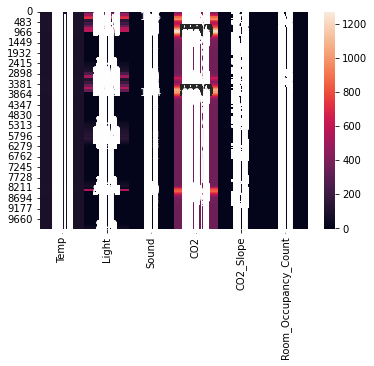

In [55]:
#find relationship between columns in form of a heat map
sns.heatmap(df1, annot=True, fmt=".1f")

We can see that the Room Occupancy is empty (i.e., 0) for the majority of the time readings were collected.  This explains why most of our data does not appear to be normally distributed.  Most values are skewed to the left, indicating no or low sensor readings while rooms are vacant.  We will likely need to consider data tranformations and/or normalizations prior to training our machine learning models.

## Machine Learning Tasks

### Task 1a - Deep Learning LSTM Time Series Prediction

For our Deep Learning Long Short Term Memory (LSTM) Time Series prediction, we will begin by making a copy of our dataframe and normalize the data so that they are on similar scales.

In [27]:
# Start with normalizing data here in new dataframe???...
# df_lstm = df.copy()

In [31]:
df_lstm = pd.read_csv('Occupancy_Estimation.csv')

In [33]:
# create Datetime column

# combine into a single column
df_lstm['Datetime'] = df_lstm['Date'] + ' ' + df_lstm['Time']

# convert to datetime, specify that year comes first in the format
df_lstm['Datetime'] = pd.to_datetime(df_lstm['Datetime'], yearfirst=True)

In [34]:
# convert to date and time data types
df_lstm['Date'] = df_lstm['Datetime'].dt.date
df_lstm['Time'] = df_lstm['Datetime'].dt.time

In [6]:
df_lstm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  object        
 1   Time                  10129 non-null  object        
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
#split data subset into 80/20 for train/validation
train_df, val_df = train_test_split(df_lstm, test_size=0.2, random_state=100, shuffle=False)

In [36]:
#reset the indices for cleanliness
train_df = train_df.reset_index()
val_df = val_df.reset_index()

In [37]:
from sklearn import preprocessing
# select sensor columns only (and cycle_norm)
cols_normalize = train_df.columns.difference(['Date','Time','Datetime', 'index', 'Room_Occupancy_Count'])

# scale sensor columns between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)

#recombine scaled columns with index/indicator columns
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

train_df.head()

,index,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,...,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Datetime
0,0,2017-12-22,10:49:41,0.000000,0.0,0.068571,0.271605,0.733333,0.131783,0.189286,...,0.005236,0.044118,0.002762,0.002985,0.043478,0.462487,0.0,0.0,1,2017-12-22 10:49:41
1,1,2017-12-22,10:50:12,0.000000,0.0,0.068571,0.308642,0.733333,0.127907,0.189286,...,0.227749,0.002941,0.002762,0.002985,0.043478,0.454431,0.0,0.0,1,2017-12-22 10:50:12
2,2,2017-12-22,10:50:42,0.041667,0.0,0.034286,0.308642,0.733333,0.131783,0.189286,...,0.096859,0.020588,0.008287,0.002985,0.043478,0.446123,0.0,0.0,1,2017-12-22 10:50:42
3,3,2017-12-22,10:51:13,0.041667,0.0,0.068571,0.308642,0.733333,0.131783,0.189286,...,0.091623,0.017647,0.013812,0.011940,0.043478,0.437563,0.0,0.0,1,2017-12-22 10:51:13
4,4,2017-12-22,10:51:44,0.041667,0.0,0.068571,0.308642,0.733333,0.131783,0.192857,...,0.031414,0.005882,0.002762,0.002985,0.043478,0.428751,0.0,0.0,1,2017-12-22 10:51:44


In [38]:
#define sequence length
seq_length = 25
ph = 1

# pick the feature columns 
feat_cols = ['S4_Temp', 'S5_CO2']

#create nested list of features for each engine and timestamp sequence
seq_arrays = []
seq_labs = []

rlen = len(train_df) - seq_length - ph
for start in range(0, rlen):
    seq_arrays.append(train_df[feat_cols].iloc[start:start+seq_length].to_numpy())
    seq_labs.append([train_df['Room_Occupancy_Count'].iloc[start:start+seq_length+1].to_numpy()[-1]])
    
#convert to numpy arrays and floats to appease keras/tensorflow        
seq_arrays = np.array(seq_arrays, dtype = object).astype(np.float32)
seq_labs = np.array(seq_labs, dtype = object).astype(np.float32)

In [39]:
seq_arrays.shape

(8077, 25, 2)

In [40]:
seq_labs.shape

(8077, 1)

In [41]:
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from keras.layers.core import Activation
from keras.utils import pad_sequences

# define path to save model
model_path = 'LSTM_model1.h5'

# build the network
nb_features = seq_arrays.shape[2]
nb_out = seq_labs.shape[1]

model = Sequential()

#add first LSTM layer
model.add(LSTM(
         input_shape=(seq_length, nb_features),
         units=5, 
         return_sequences=True))
model.add(Dropout(0.2)) 

# add second LSTM layer
model.add(LSTM(
          units=3,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation('linear'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 5)             160       
                                                                 
 dropout (Dropout)           (None, 25, 5)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3)                 108       
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 272
Trainable params: 272
Non-trainable pa

In [42]:
# fit the network
history = model.fit(seq_arrays, seq_labs, epochs=100, batch_size=200, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())

Epoch 1/100
39/39 - 4s - loss: 0.6384 - mse: 0.6384 - val_loss: 0.3934 - val_mse: 0.3934 - 4s/epoch - 105ms/step
Epoch 2/100
39/39 - 0s - loss: 0.4553 - mse: 0.4553 - val_loss: 0.4109 - val_mse: 0.4109 - 440ms/epoch - 11ms/step
Epoch 3/100
39/39 - 0s - loss: 0.4345 - mse: 0.4345 - val_loss: 0.3946 - val_mse: 0.3946 - 403ms/epoch - 10ms/step
Epoch 4/100
39/39 - 0s - loss: 0.4384 - mse: 0.4384 - val_loss: 0.3916 - val_mse: 0.3916 - 418ms/epoch - 11ms/step
Epoch 5/100
39/39 - 0s - loss: 0.4343 - mse: 0.4343 - val_loss: 0.3975 - val_mse: 0.3975 - 405ms/epoch - 10ms/step
Epoch 6/100
39/39 - 0s - loss: 0.3996 - mse: 0.3996 - val_loss: 0.4040 - val_mse: 0.4040 - 405ms/epoch - 10ms/step
Epoch 7/100
39/39 - 0s - loss: 0.3712 - mse: 0.3712 - val_loss: 0.4040 - val_mse: 0.4040 - 408ms/epoch - 10ms/step
Epoch 8/100
39/39 - 0s - loss: 0.3391 - mse: 0.3391 - val_loss: 0.3841 - val_mse: 0.3841 - 412ms/epoch - 11ms/step
Epoch 9/100
39/39 - 0s - loss: 0.3364 - mse: 0.3364 - val_loss: 0.3997 - val_mse: 

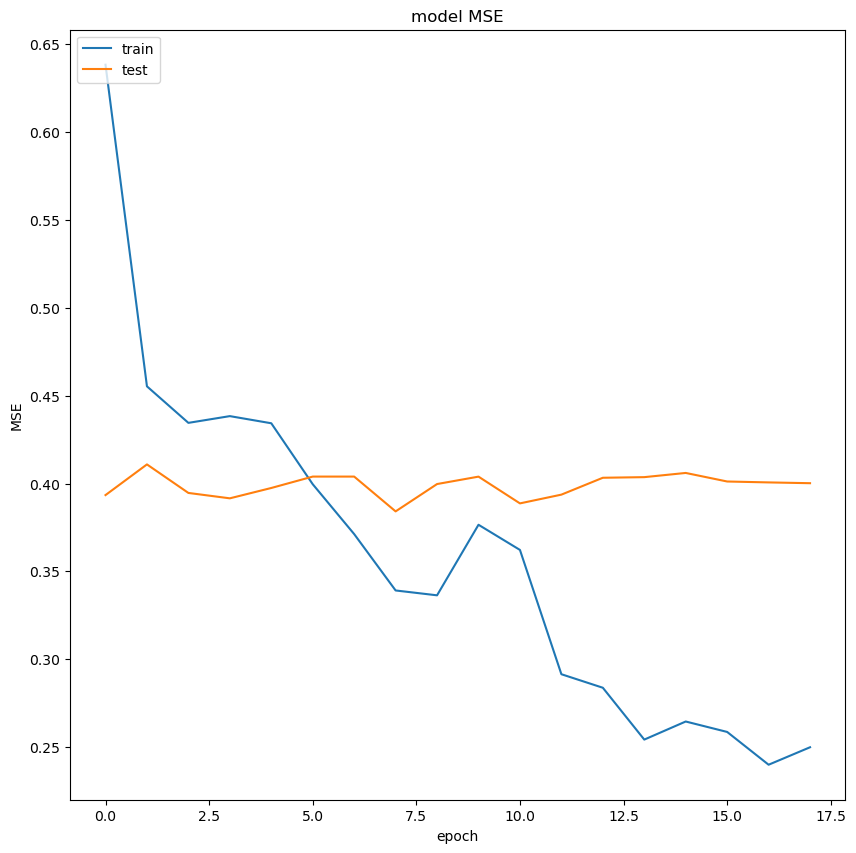

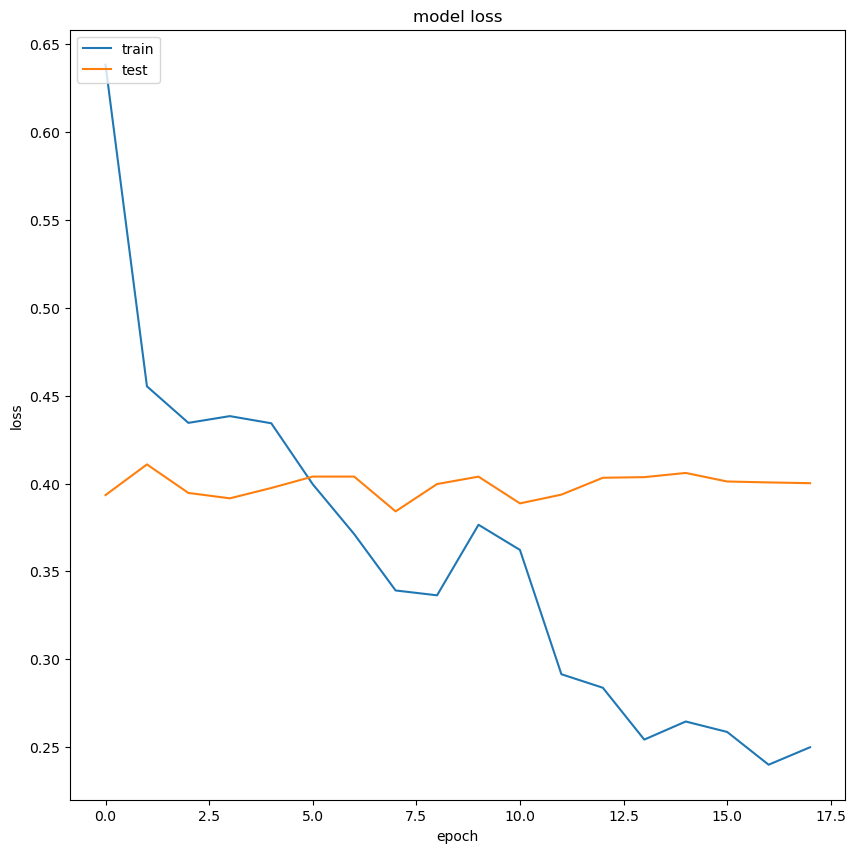

In [43]:
# summarize history for MSE
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_mse1.png")

# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("LSTM_loss1.png")

In [19]:
# TEST - DID NOT RUN THIS CELL but IS THIS NEEDED??? 
# MinMax normalization (from 0 to 1)
norm_val_df = pd.DataFrame(min_max_scaler.transform(val_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=val_df.index)
val_join_df = val_df[val_df.columns.difference(cols_normalize)].join(norm_val_df)
val_df = val_join_df.reindex(columns = val_df.columns)
val_df = val_df.reset_index(drop=True)

In [44]:
val_arrays = []
val_labs = []

#create list of GAP readings starting with a minimum of five readings
rlen = len(val_df) - 1
for start in range(5, rlen):
    if (start < seq_length):
        val_arrays.append(val_df[feat_cols][0:start].to_numpy())
        #val_labs.append(val_df['Room_Occupancy_Count'].iloc[0:start+1].to_numpy()[-1])
        val_labs.append(val_df['Room_Occupancy_Count'][start+1])
    else:
        val_arrays.append(val_df[feat_cols].iloc[start-seq_length:start].to_numpy())
        # val_labs.append(val_df['Room_Occupancy_Count'].iloc[start-seq_length:start+1].to_numpy()[-1])
        val_labs.append(val_df['Room_Occupancy_Count'][start+1])

# use the pad_sequences function on your input sequences
# remember that we will later want our datatype to be np.float32 
#val_arrays = pad_sequences(val_arrays, dtype='float32')
val_arrays = pad_sequences(val_arrays, maxlen = seq_length, dtype = np.float32)

#convert labels to numpy arrays and floats to appease keras/tensorflow
val_labs = np.array(val_labs, dtype = object).astype(np.float32)

In [51]:
val_labs

array([3., 3., 3., ..., 0., 0., 0.], dtype=float32)

64/64 - 0s - loss: 6.6607 - mse: 6.6742 - 158ms/epoch - 2ms/step

MSE: 6.674167633056641
64/64 [==============================] - 0s 2ms/step


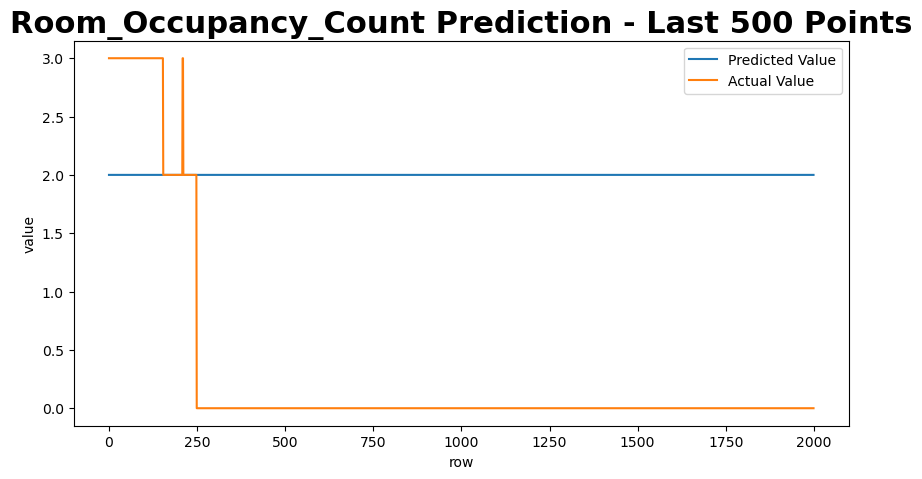

In [60]:
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))

y_pred_test = model.predict(val_arrays)
y_true_test = val_labs
y_pred_test2 = np.floor(y_pred_test)

test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('submit_test.csv', index = None)

# Plot the predicted data vs. the actual data
# we will limit our plot to the first 2000 predictions for better visualization
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test2[-2000:], label = 'Predicted Value')
plt.plot(y_true_test[-2000:], label = 'Actual Value')
plt.title('Room_Occupancy_Count Prediction - Last 500 Points', fontsize=22, fontweight='bold')
plt.ylabel('value')
plt.xlabel('row')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")

### Task 2a - Deep Learning Model for Room Accuracy Count Prediction

In [64]:
df_dl = pd.read_csv('Occupancy_Estimation.csv')

In [65]:
# Divide the data in to features - X and labels - y

labels = df_dl.pop('Room_Occupancy_Count').values.astype('float32')
features = df_dl.iloc[:,2:].values.astype('float32')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Divide the data into train set, validation set, and test set
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=.1)

In [67]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Change the labels dataset to one_hot
y_train, y_valid, y_test = to_categorical(y_train),to_categorical(y_valid), to_categorical(y_test)

In [69]:
# Check the shape of the data
print(X_train_scaled.shape,X_valid_scaled.shape,X_test_scaled.shape)

(8204, 16) (912, 16) (1013, 16)


In [70]:
# Check the shape of the data
print(y_train.shape,y_valid.shape,y_test.shape)

(8204, 4) (912, 4) (1013, 4)


In [47]:
import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential,load_model

In [71]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# half the learning rate when val_loss stop reduce during training
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                              patience=3,
                                                              verbose=0,
                                                              factor=.5,
                                                              min_lr=.00001)

In [72]:
model_class = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=[16]),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # Output 4 units representing the Occupancy Number 0, 1, 2, 3
])

model_class.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

print(model_class.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               2176      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 35,716
Trainable params: 35,716
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
history = model_class.fit(X_train_scaled,y_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_valid_scaled,y_valid),
                callbacks=[learning_rate_reduction],
                verbose=1)

Epoch 1/50
257/257 [==============================] - 1s 1ms/step - loss: 0.1985 - accuracy: 0.9508 - val_loss: 0.0372 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 2/50
257/257 [==============================] - 0s 995us/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0251 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 3/50
257/257 [==============================] - 0s 991us/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0352 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 4/50
257/257 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9911 - val_loss: 0.0237 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 5/50
257/257 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9920 - val_loss: 0.0238 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 6/50
257/257 [==============================] - 0s 991us/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0227 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 7/50
257/257 [==============================] - 0s 1ms/ste

In [74]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


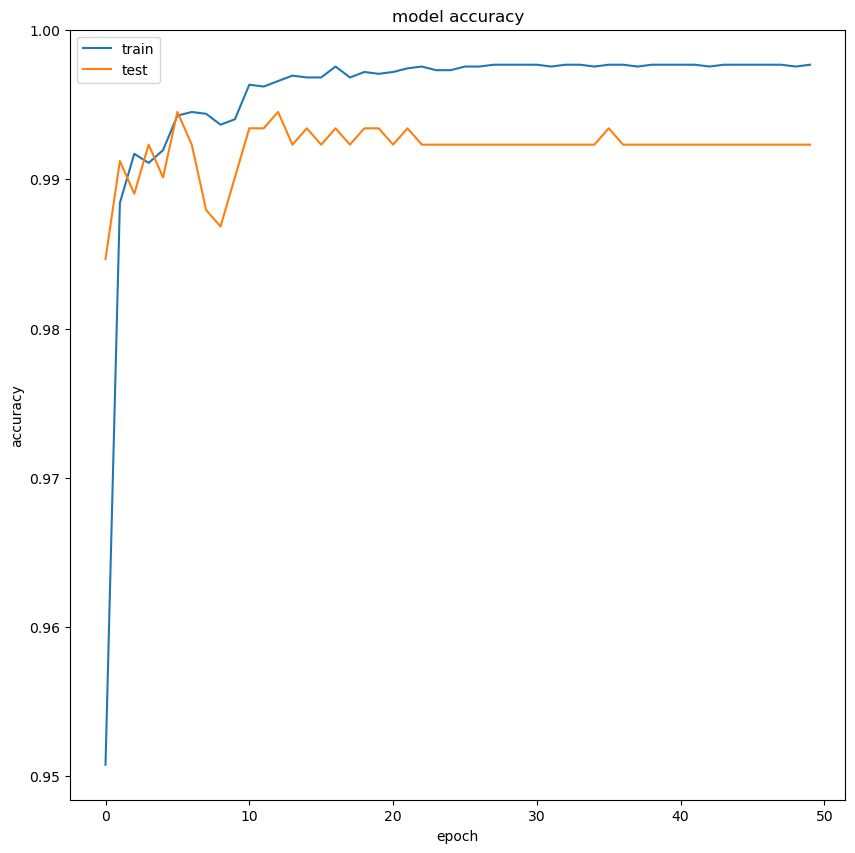

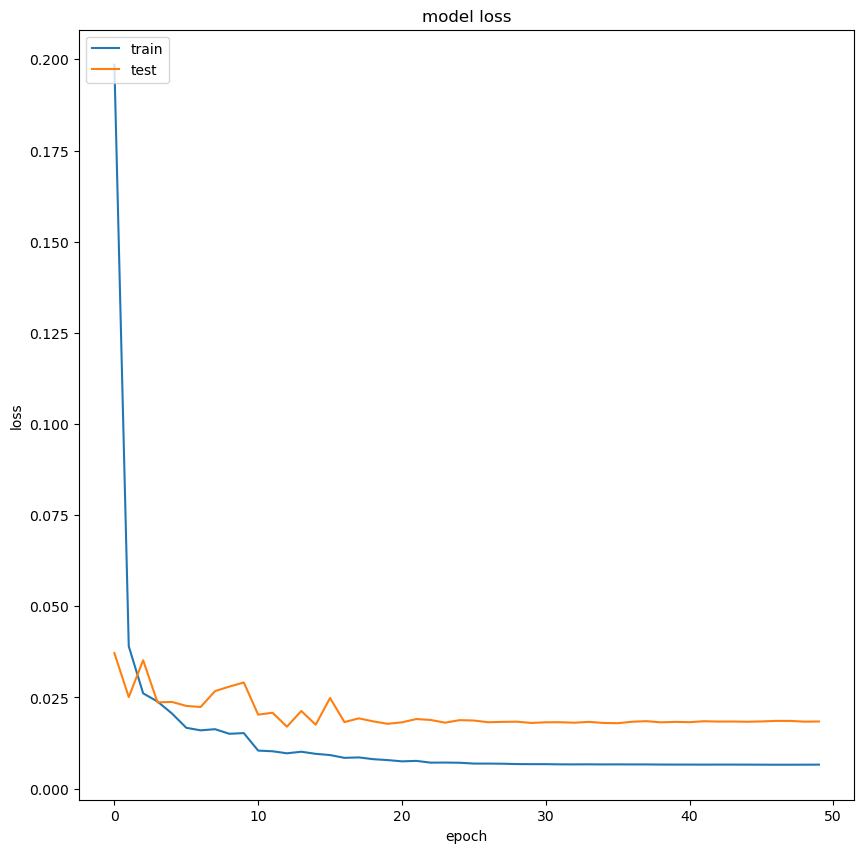

257/257 [==============================] - 0s 679us/step - loss: 0.0065 - accuracy: 0.9977
Accuracy: 0.9976840615272522
257/257 [==============================] - 0s 589us/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[6644    0    0    0]
 [   0  383    1    0]
 [   0    0  614    7]
 [   0    0   11  544]]
precision =  0.9976840565577767 



In [75]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
# summarize history for Accuracy
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_accuracy.png")

# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_loss.png")

# training metrics
scores = model_class.evaluate(X_train_scaled, y_train, verbose=1, batch_size=32)
print('Accuracy: {}'.format(scores[1]))

# make predictions and compute confusion matrix
y_pred = model_class.predict(X_train_scaled,verbose=1, batch_size=32)
y_pred = np.argmax(y_pred, axis=1)
# y_true = y_train
y_true = np.argmax(y_train, axis=1)

test_set = pd.DataFrame(y_pred)
test_set.to_csv('binary_submit_train.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(cm)

# compute precision and recall
precision = precision_score(y_true, y_pred, average='micro')
#recall = recall_score(y_true, y_pred.round, average='micro')
#print( 'precision = ', precision, '\n', 'recall = ', recall)
print( 'precision = ', precision, '\n')

Use the model to predict the room occupancy of the test_set and see the results!

In [76]:
from sklearn.metrics import classification_report
def process_data(data):
    return np.array(tf.argmax(data,axis=1),dtype='float32')
y_pred = process_data(model_class.predict(X_test_scaled))
# y_pred = process_data(model_class.predict(X_test_scaled))
print(classification_report(tf.argmax(y_test,axis=1),y_pred))

32/32 [==============================] - 0s 724us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       835
           1       1.00      0.97      0.99        36
           2       0.94      0.96      0.95        71
           3       0.96      0.96      0.96        71

    accuracy                           0.99      1013
   macro avg       0.98      0.97      0.97      1013
weighted avg       0.99      0.99      0.99      1013



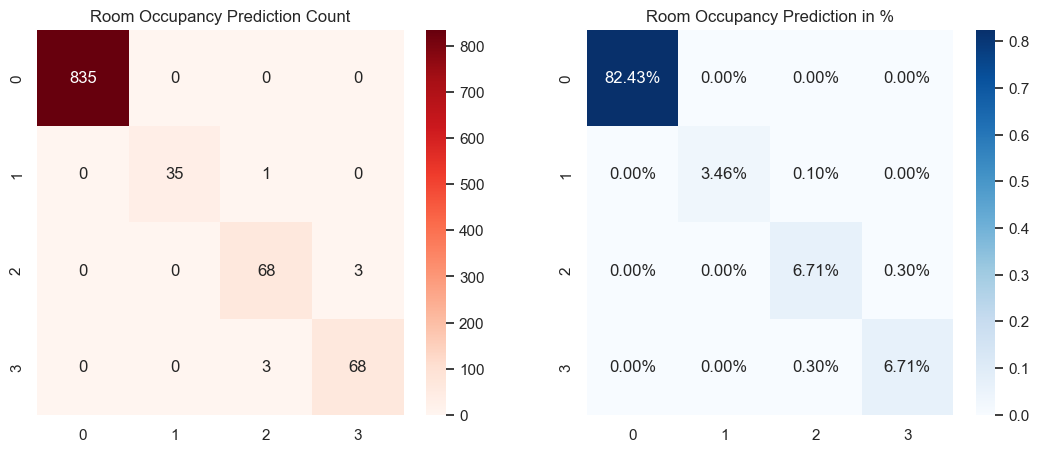

In [77]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(tf.argmax(y_test,axis=1),y_pred)
sns.set_theme(style='whitegrid',rc={'figure.figsize':(13,5)})

fig, axs = plt.subplots(1,2)
# Number count
ax1 = sns.heatmap(cf_matrix,annot=True,cmap='Reds',ax=axs[0],fmt="g")
ax1.set_title('Room Occupancy Prediction Count')
# Percentage
ax2 = sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues',ax=axs[1])
ax2.set_title('Room Occupancy Prediction in %');

### Task 2 - Multiple Regression Prediction

For our Multiple Regression prediction, we will first determine which features we would like to include in the model, and we will make sure there isn't significant multicollinearity present.

In [2]:
# Start with new dataframe here???...
# df_mr = df.copy()
# create new dataframe with raw data
df_mr = pd.read_csv('Occupancy_Estimation.csv')

## Results

In [3]:
# create Datetime column

# combine into a single column
df_mr['Datetime'] = df_mr['Date'] + ' ' + df_mr['Time']

# convert to datetime, specify that year comes first in the format
df_mr['Datetime'] = pd.to_datetime(df_mr['Datetime'], yearfirst=True)

In [4]:
 #convert datetime to epoch/unix time
df_mr['time'] = (pd.to_datetime(df_mr.Datetime)-pd.to_datetime('1970-01-01')).dt.total_seconds()

In [25]:
#add to the x-variables in our dataset
x_variables = ['time', 'Room_Occupancy_Count', 'S4_Temp']
ts = df_mr[x_variables]
ys = pd.DataFrame(df_mr.S5_CO2)

ph = 2*60 # 2 minutes or 120 seconds
###############################################################
#WE NEED TO CONVERT OUR PREDICTIVE HORIZON INTO A NUMBER OF
#TIME STEPS FOR INDEXING, BASED ON THE RESOLUTION OF OUR DATA.
#IN THIS CASE OUR DATA IS COLLECTED EVERY 30 seconds
##############################################################
ph_index = round(ph/30)
mu = 0.9

n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [27]:
# At every iteration of the for loop a new data sample is acquired
# start with 2 leading datapoints

for i in range(2, n_s+1):
    
    # get x and y data
    # subtract 1 so that we don't give the model access to future data
    ts_tmp = ts[0:i-1] 
    
    # Use the value at the predictive horizon index as the predicted 
    # value for training
    ys_tmp = ys[ph_index-1:ph_index-1+i-1]
    
    ns = len(ys_tmp)
    
    weights = np.ones(ns)*mu
    
    for k in range(ns):
        weights[k] = weights[k]**k # weights are downweighted as per timestamp away from prediction
        
    weights = np.flip(weights, 0)
    
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    
    #store model coefficients and intercepts to compute prediction
    m_tmp_a = model_tmp.coef_[0][0]
    m_tmp_b = model_tmp.coef_[0][1]
    m_tmp_c = model_tmp.coef_[0][2]
    q_tmp = model_tmp.intercept_

    # use current time to make the prediction
    tpa = ts.iloc[i,0] 
    tpb = ts.iloc[i,1]
    tpc = ts.iloc[i,2]
    yp = m_tmp_a * tpa + m_tmp_b * tpb + m_tmp_c * tpc + q_tmp
      
    # in order to associate the predicted value with future time,
    # add ph to current time step for visualization
    tp_pred[i-2] = tpa + ph   
    yp_pred[i-2] = yp
    

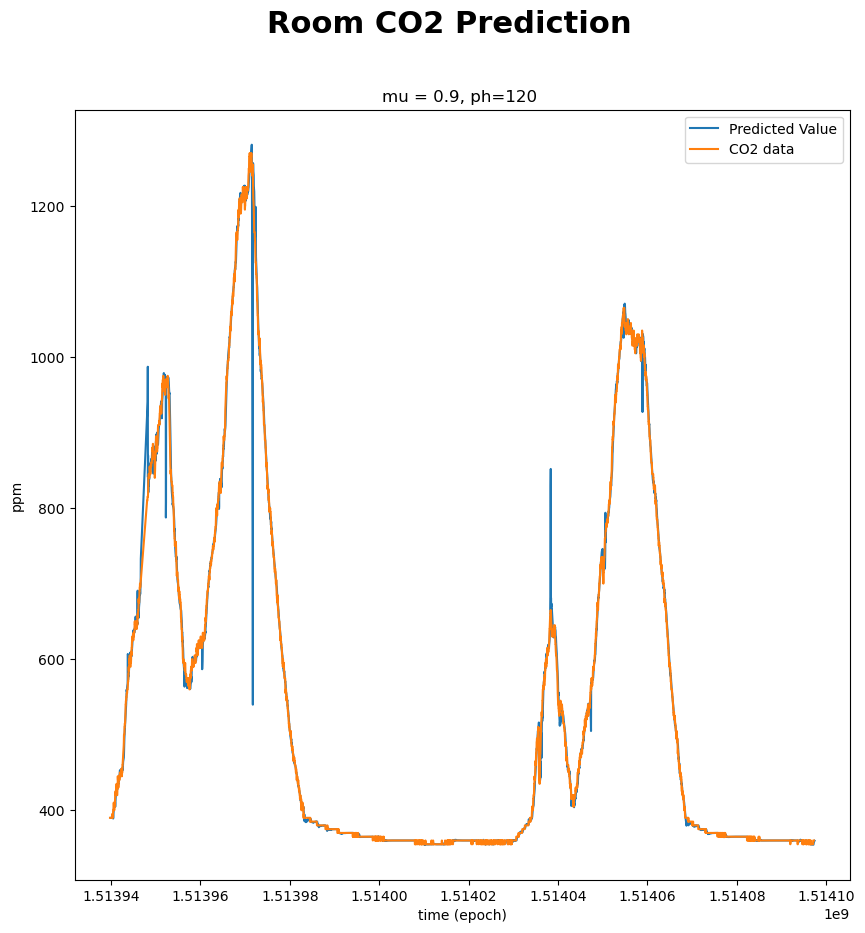

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Room CO2 Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='CO2 data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('ppm')
ax.legend()

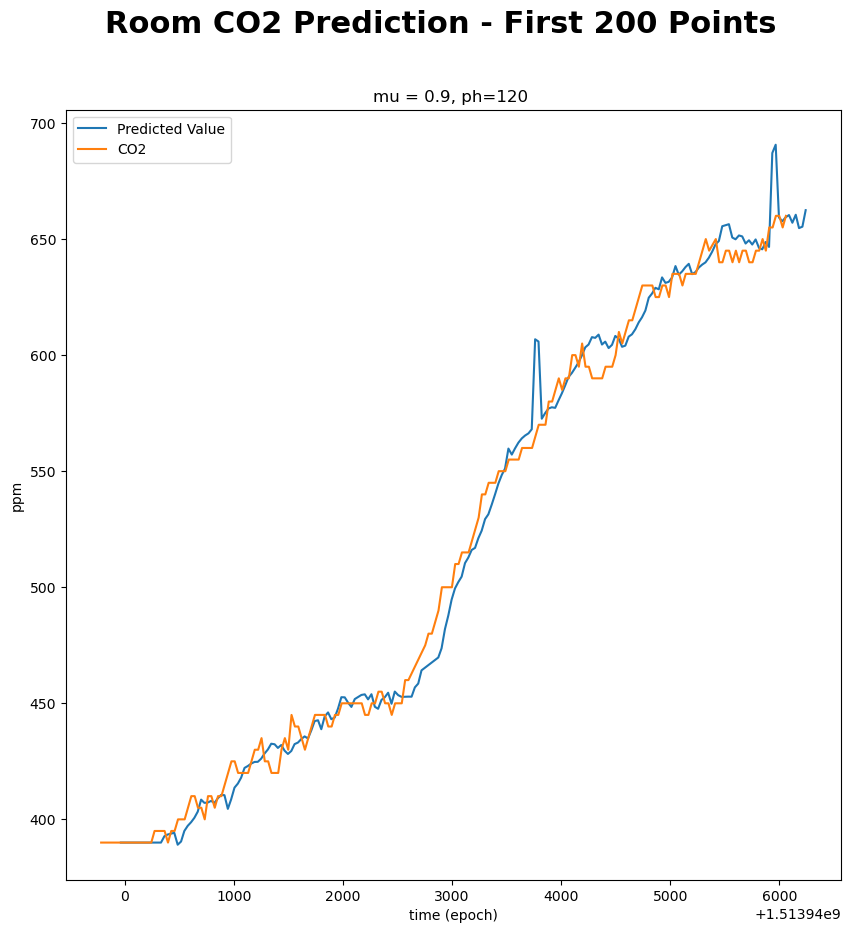

In [29]:
#Plot first 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Room CO2 Prediction - First 200 Points', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='CO2')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('ppm')
ax.legend()

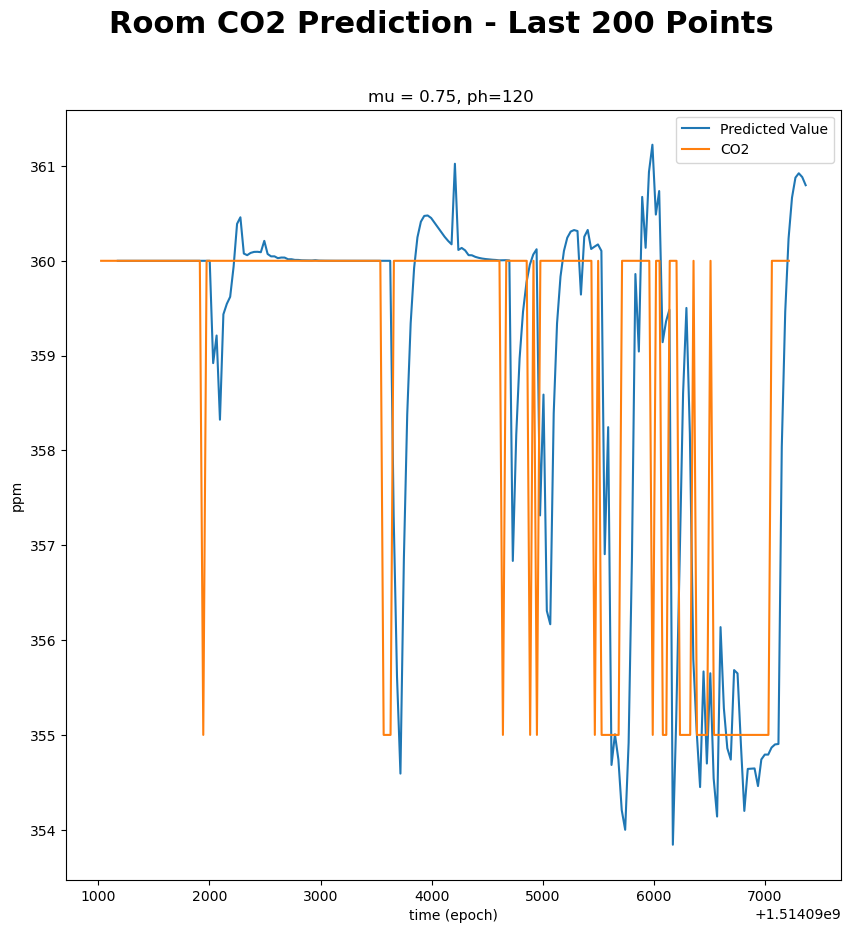

In [23]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Room CO2 Prediction - Last 200 Points', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='CO2')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('ppm')
ax.legend()

In [30]:
 #Calculate RMSE of predictions
from sklearn.metrics import mean_squared_error as mse
#############################################################
#WE USE THE PH_INDEX VARIABLE HERE TO COMPARE THE "FUTURE"
#VALUES TO THE PREDICTED VALUES
############################################################
print("MSE is", mse(ys['S5_CO2'][ph_index:5000+ph_index-1],yp_pred))

MSE is 236.3066755482854
